In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
from matplotlib.pylab import rcParams

In [2]:
df = pd.read_csv(r"C:\Users\Shaurya\Desktop\Gold_Price.csv",index_col="ds",parse_dates=["ds"])

In [3]:
df.head()

,y
ds,
2015-01-01,26586
2015-01-02,26700
2015-01-05,26847
2015-01-06,27385
2015-01-07,27159


In [4]:
df.describe()

,y
count,1637.000000
mean,33671.213806
std,7759.849682
min,24545.000000
25%,28617.000000
50%,30551.000000
75%,37961.000000
max,56117.000000


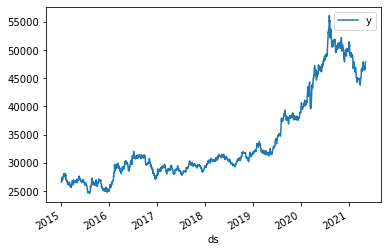

In [5]:
df.plot()

In [6]:
#Using Auto ARIMA

In [7]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df.y, test_size=0.1, shuffle=False)

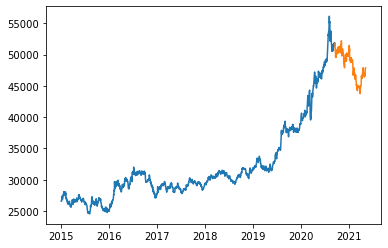

In [8]:
plt.plot(train)
plt.plot(test)

In [9]:
from pmdarima.arima import auto_arima

In [10]:
AUTOARIMA = auto_arima(train)

In [11]:
AUTOARIMA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1473
Model:               SARIMAX(5, 2, 0)   Log Likelihood              -10538.402
Date:                Tue, 11 May 2021   AIC                          21088.804
Time:                        13:05:04   BIC                          21120.566
Sample:                             0   HQIC                         21100.648
                               - 1473                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7772      0.016    -48.902      0.000      -0.808      -0.746
ar.L2         -0.5626      0.020    -28.453      0.000      -0.601      -0.524
ar.L3         -0.3846      0.017    -22.369      0.000      -0.418      -0.351
ar.L4         -0.3247      0.019    -17.495      0.000      -0.361      -0.288
ar.L5         -0.2145      0.016    -13.044      0.000      -0.247      -0.182
sigma2      9.544e+04   1583.617     60.265      0.000    9.23e+04    9.85e+04
===================================================================================
Ljung-Box (Q):                      105.63   Jarque-Bera (JB):              8292.44
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               2.14   Skew:                            -0.91
Prob(H) (two-sided):                  0.00   Kurtosis:                        14.49
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [12]:
test.shape

(164,)

In [13]:
prediction = pd.DataFrame(AUTOARIMA.predict(164),index=test.index)
prediction

,0
ds,
2020-09-18,51484.442028
2020-09-21,51360.363052
2020-09-22,51350.973207
2020-09-23,51316.269001
2020-09-24,51254.392024
...,...
2021-05-04,40424.735750
2021-05-05,40355.080332
2021-05-06,40285.424914


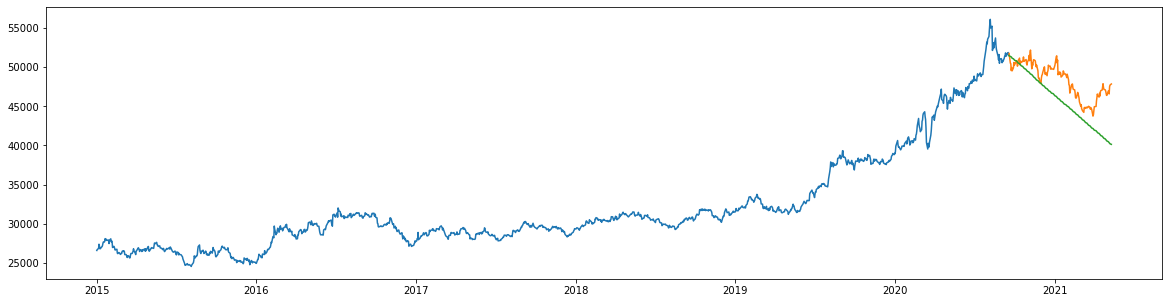

In [14]:
plt.figure(figsize=(20,5))
plt.plot(train,label="Training")
plt.plot(test,label="Testing")
plt.plot(prediction,label="Pridiction")
plt.show()

In [15]:
#Using ARIMA

In [16]:
from statsmodels.tsa.stattools import adfuller

In [17]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(Value):
    result=adfuller(Value)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")


In [18]:
adfuller_test(df.y)

ADF Test Statistic : 0.14178905878168965
p-value : 0.9688011007592553
#Lags Used : 14
Number of Observations Used : 1622
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [19]:
ts_log = np.log(df.y)

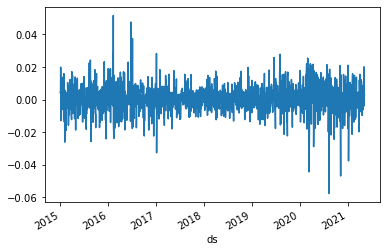

In [20]:
ts_log_diff = ts_log - ts_log.shift(1)
ts_log_diff.dropna().plot()

In [21]:
ts_log_diff = ts_log_diff.dropna()

In [22]:
ts_log_diff_S=df['y']-df['y'].shift(12)
ts_log_diff_S=ts_log_diff_S.dropna()

In [25]:
adfuller_test(ts_log_diff)

ADF Test Statistic : -40.76915716364963
p-value : 0.0
#Lags Used : 0
Number of Observations Used : 1635
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


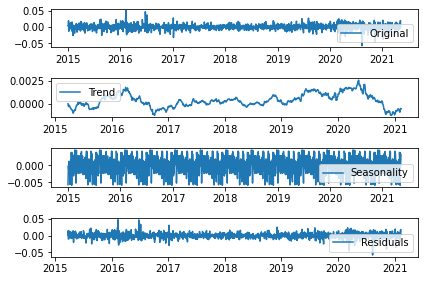

In [26]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log_diff,period=124)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log_diff, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

In [27]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

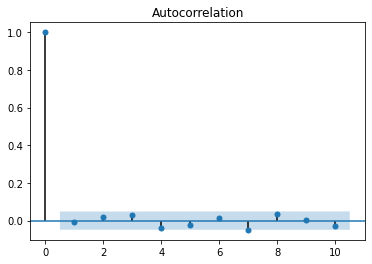

In [28]:
ACF = plot_acf(ts_log_diff,lags=10)

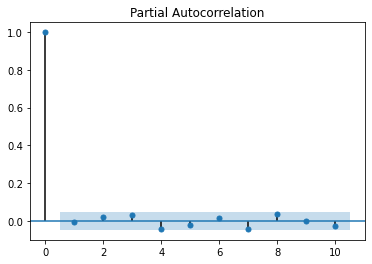

In [29]:
PACF = plot_pacf(ts_log_diff,lags=10)

In [30]:
from statsmodels.tsa.arima_model import ARIMA

In [31]:
model = ARIMA(df.y, order=(7,1,4))
result = model.fit()
print(result.summary())

C:\Users\Shaurya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\Shaurya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                 1636
Model:                 ARIMA(7, 1, 4)   Log Likelihood              -11705.999
Method:                       css-mle   S.D. of innovations            309.883
Date:                Tue, 11 May 2021   AIC                          23437.998
Time:                        13:05:36   BIC                          23508.198
Sample:                             1   HQIC                         23464.036
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.6293      7.848      1.609      0.108      -2.752      28.011
ar.L1.D.y      0.5807      0.097      5.967      0.000       0.390       0.772
ar.L2.D.y     -0.1741      0.052     -3.363      0.0

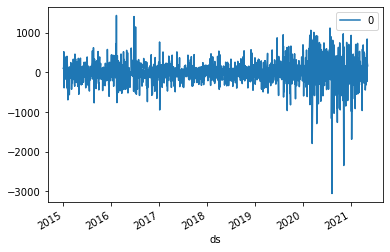

In [32]:
# plot residual errors
residuals = pd.DataFrame(result.resid)
residuals.plot()
pyplot.show()

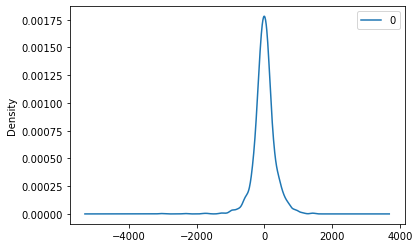

                 0
count  1636.000000
mean      0.369926
std     309.999942
min   -3051.626057
25%    -148.577035
50%      -3.844053
75%     140.277219
max    1436.929889


In [33]:
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

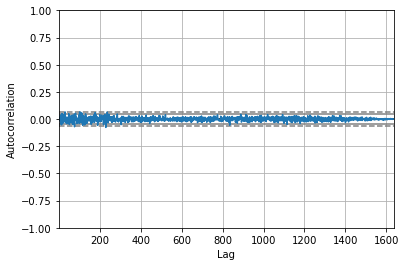

In [34]:
from pandas.plotting import autocorrelation_plot
#Residual autocorrelation plot
autocorrelation_plot(residuals)
pyplot.show()

In [35]:
prediction2 = pd.Series(result.fittedvalues,copy=True)

In [36]:
prediction2

ds
2015-01-02     12.629262
2015-01-05     11.697085
2015-01-06     15.556398
2015-01-07     16.786631
2015-01-08     37.074872
                 ...    
2021-05-04     31.703059
2021-05-05     36.779698
2021-05-06    102.107988
2021-05-07    -60.239235
2021-05-10    -26.049244
Length: 1636, dtype: float64

In [37]:
#convert to cumulative sum

In [38]:
prediction2_sum = prediction2.cumsum()

In [39]:
print(prediction2_sum)

ds
2015-01-02       12.629262
2015-01-05       24.326348
2015-01-06       39.882746
2015-01-07       56.669377
2015-01-08       93.744250
                  ...     
2021-05-04    20616.201962
2021-05-05    20652.981660
2021-05-06    20755.089648
2021-05-07    20694.850414
2021-05-10    20668.801169
Length: 1636, dtype: float64


In [40]:
prediction2_sum_log = pd.Series(ts_log, index=ts_log.index)
prediction2_sum_log = prediction2_sum_log.add(prediction2_sum,fill_value=0)
prediction2_sum_log.head()

ds
2015-01-01    10.188140
2015-01-02    22.821681
2015-01-05    34.524257
2015-01-06    50.100497
2015-01-07    66.878841
dtype: float64

In [41]:
predictions_ARIMA=np.exp(prediction2_sum_log)

C:\Users\Shaurya\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


C:\Users\Shaurya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:580: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
C:\Users\Shaurya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:580: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
C:\Users\Shaurya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:580: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


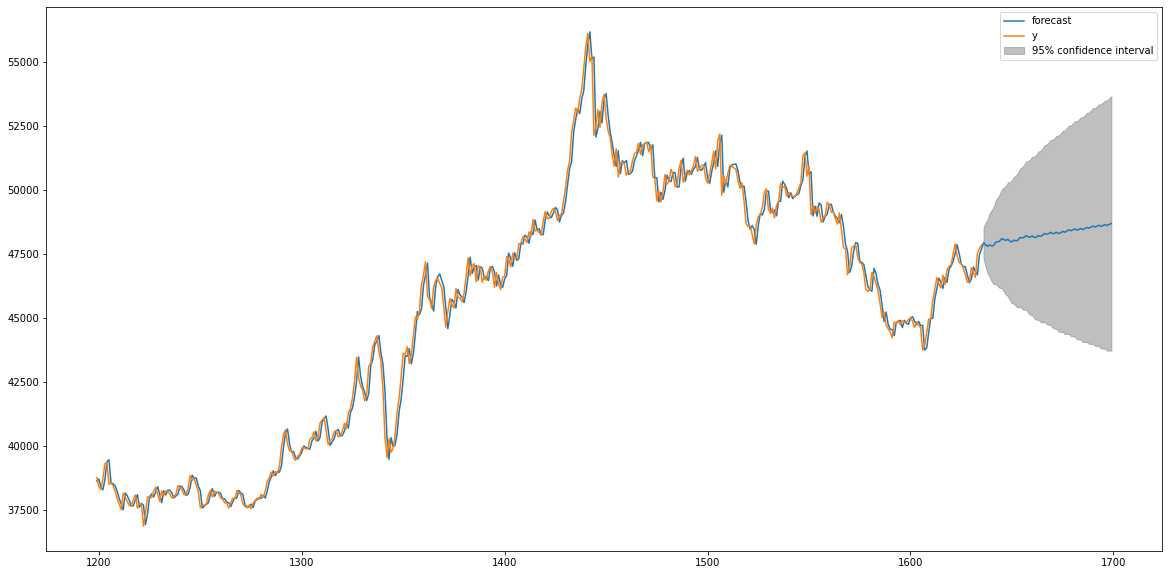

In [42]:
rcParams['figure.figsize']=20,10
result.plot_predict(1200,1700)
x=result.forecast(steps=120)